# Overview of Dataset

# **Online Retail Transaction Dataset**

## **Data Set Information**
This **Online Retail II** dataset contains all transactions from a UK-based and registered non-store online retail business between **01/12/2009** and **09/12/2011**.  
The company primarily sells **unique all-occasion giftware**. Many customers of the company are wholesalers.

---

## **Attribute Information**

- **InvoiceNo**:  
  - *Type*: Nominal  
  - *Description*: A 6-digit integral number uniquely assigned to each transaction.  
    - If this code starts with the letter `'C'`, it indicates a cancellation.

- **StockCode**:  
  - *Type*: Nominal  
  - *Description*: A 5-digit integral number uniquely assigned to each distinct product (item).

- **Description**:  
  - *Type*: Nominal  
  - *Description*: The name of the product (item).

- **Quantity**:  
  - *Type*: Numeric  
  - *Description*: The quantity of each product (item) per transaction.

- **InvoiceDate**:  
  - *Type*: Numeric  
  - *Description*: The day and time when a transaction was generated.

- **UnitPrice**:  
  - *Type*: Numeric  
  - *Description*: The product price per unit in sterling (£).

- **CustomerID**:  
  - *Type*: Nominal  
  - *Description*: A 5-digit integral number uniquely assigned to each customer.

- **Country**:  
  - *Type*: Nominal  
  - *Description*: The name of the country where a customer resides.

---

## **Key Highlights**
- Time Range: **01/12/2009 to 09/12/2011**
- Business Type: Non-store online retail
- Primary Products: Unique all-occasion giftware
- Customers: Includes wholesalers


# Import Required Libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=fda5827203a121fac89d8fc90dffa1a2ad5037906c7461029b7b31c31fd3ebcc
  Stored in directory: c:\users\maverick\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


from apyori import apriori



In [4]:
retail_data = pd.read_excel(r"D:\Data Science Gurus Youtube Channel\Introduction To Machine Learning Course- Beginers Guide\Association Rules Machine Learning\online_retail_II.xlsx\online_retail_II.xlsx")

In [5]:
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
retail_data.shape

(525461, 8)

Besed on data description we have some canceled invoices.
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

So we are going to remove canceled invoices.

In [8]:
retail_data[retail_data['Invoice'].str.startswith('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
not_canceled_retail_data = retail_data[~ retail_data['Invoice'].str.startswith('C', na=False)]

In [10]:
not_canceled_retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
not_canceled_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515255 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515255 non-null  object        
 1   StockCode    515255 non-null  object        
 2   Description  512327 non-null  object        
 3   Quantity     515255 non-null  int64         
 4   InvoiceDate  515255 non-null  datetime64[ns]
 5   Price        515255 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      515255 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


In [12]:
not_canceled_retail_data.shape

(515255, 8)

In [13]:
countrybase_retail = not_canceled_retail_data.groupby(['Country']).agg(
                     InvoiceCount = ('Invoice', 'count'),
                     QuantityCount = ('Quantity', 'count'),
                     TotalPrice = ('Price', 'sum'),
                     Customers = ('Customer ID', 'count')).reset_index()

In [14]:
countrybase_retail.sort_values('TotalPrice', ascending=False, 
                               inplace=True, ignore_index=True)

In [15]:
countrybase_retail

,Country,InvoiceCount,QuantityCount,TotalPrice,Customers
0,United Kingdom,477058,477058,1850082.783,370951
1,EIRE,9460,9460,56118.240,8507
2,Germany,7661,7661,26487.111,7661
3,France,5532,5532,22269.680,5470
4,Norway,365,365,14736.240,365
5,Netherlands,2730,2730,7424.490,2730
6,Spain,1235,1235,6276.830,1235
7,Belgium,1038,1038,5631.830,1038
8,Switzerland,1170,1170,5140.850,1170
9,Sweden,887,887,4869.990,868


### Show Total Revenue By Top 10 Countries

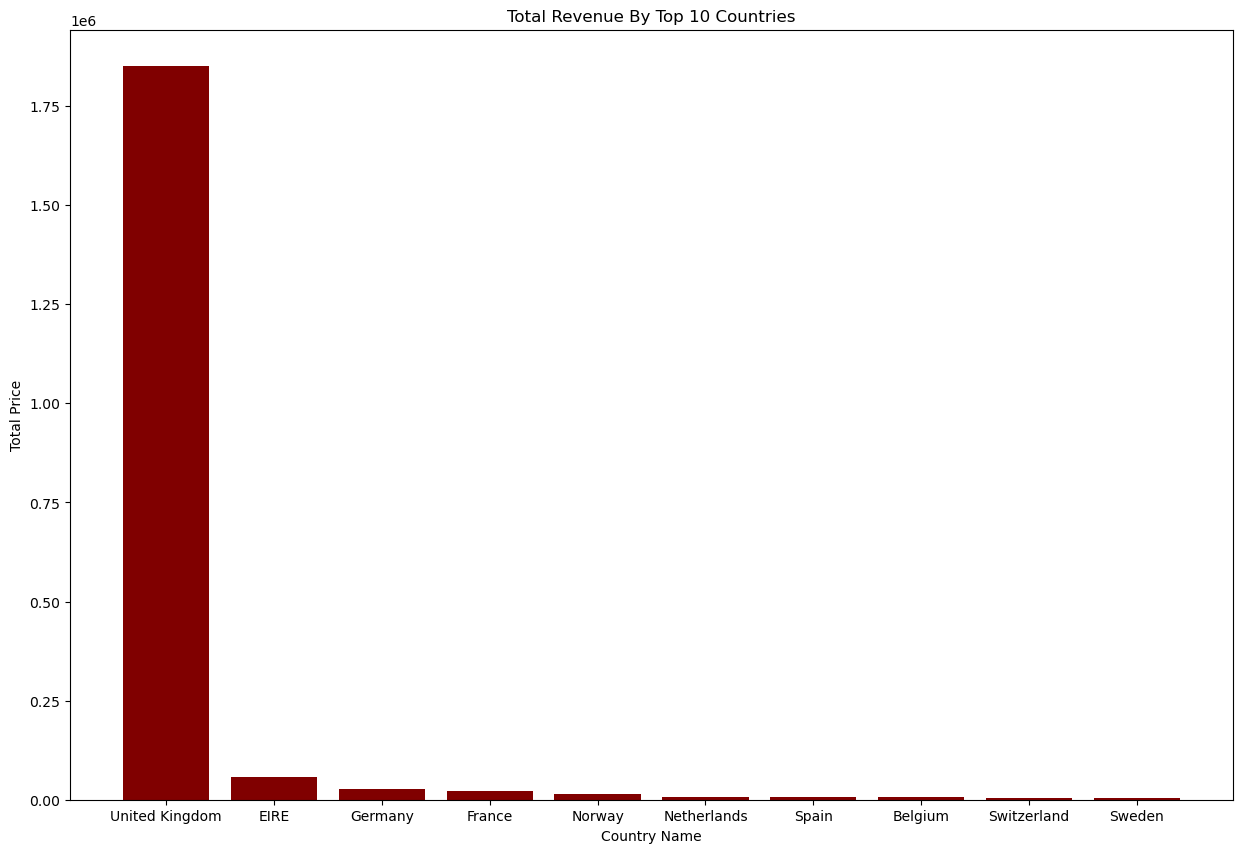

In [16]:
fig = plt.figure(figsize = (15, 10))
 
plt.bar(countrybase_retail['Country'].head(10), countrybase_retail['TotalPrice'].head(10), 
        color ='maroon')
 
plt.xlabel("Country Name")
plt.ylabel("Total Price")
plt.title("Total Revenue By Top 10 Countries")
plt.show()

In [17]:
not_canceled_retail_data['StockCode'].value_counts()

StockCode
85123A    3423
22423     2055
85099B    2015
21212     1920
21232     1714
          ... 
90080        1
20904        1
79157B       1
72331R       1
21120        1
Name: count, Length: 4627, dtype: int64

In [18]:
not_canceled_retail_data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3456
REGENCY CAKESTAND 3 TIER              2046
STRAWBERRY CERAMIC TRINKET BOX        1714
PACK OF 72 RETRO SPOT CAKE CASES      1456
ASSORTED COLOUR BIRD ORNAMENT         1450
                                      ... 
LARGE HANGING GLASS+ZINC LANTERN         1
Dotcomgiftshop Gift Voucher £80.00       1
17129c                                   1
bad quality                              1
entry error                              1
Name: count, Length: 4666, dtype: int64

# Prepare The Dataset

In [19]:
# Delete null values and change the type of 'Description' to string
not_canceled_retail_data = not_canceled_retail_data[~ not_canceled_retail_data['Description'].isna()]
not_canceled_retail_data['Description'] = not_canceled_retail_data['Description'].astype(str)

In [20]:
gb_retail_data = not_canceled_retail_data.groupby(['Invoice'])['Description'].apply(list).to_frame().reset_index()

In [21]:
gb_retail_data

,Invoice,Description
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,489435,"[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE..."
2,489436,"[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO..."
3,489437,"[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ..."
4,489438,"[DINOSAURS WRITING SET , SET OF MEADOW FLOWE..."
...,...,...
21291,538170,"[ASSORTED COLOUR BIRD ORNAMENT, HAND WARMER BA..."
21292,538171,"[3 TIER SWEETHEART GARDEN SHELF, FIRST AID TIN..."
21293,A506401,[Adjust bad debt]
21294,A516228,[Adjust bad debt]


In [22]:
transactions = gb_retail_data['Description'].to_list()

In [46]:
transactions

[['15CM CHRISTMAS GLASS BALL 20 LIGHTS',
  'PINK CHERRY LIGHTS',
  ' WHITE CHERRY LIGHTS',
  'RECORD FRAME 7" SINGLE SIZE ',
  'STRAWBERRY CERAMIC TRINKET BOX',
  'PINK DOUGHNUT TRINKET POT ',
  'SAVE THE PLANET MUG',
  'FANCY FONT HOME SWEET HOME DOORMAT'],
 ['CAT BOWL ',
  'DOG BOWL , CHASING BALL DESIGN',
  'HEART MEASURING SPOONS LARGE',
  'LUNCHBOX WITH CUTLERY FAIRY CAKES '],
 ['DOOR MAT BLACK FLOCK ',
  'LOVE BUILDING BLOCK WORD',
  'HOME BUILDING BLOCK WORD',
  'ASSORTED COLOUR BIRD ORNAMENT',
  ' PEACE WOODEN BLOCK LETTERS',
  'CHRISTMAS CRAFT WHITE FAIRY ',
  'HEART IVORY TRELLIS LARGE',
  'HEART FILIGREE DOVE LARGE',
  'FULL ENGLISH BREAKFAST PLATE',
  'PIZZA PLATE IN BOX',
  'BLACK DINER WALL CLOCK',
  'SET OF 3 BLACK FLYING DUCKS',
  'AREA PATROLLED METAL SIGN',
  'PLEASE ONE PERSON  METAL SIGN',
  'BATH BUILDING BLOCK WORD',
  'CLASSIC WHITE FRAME',
  'SMALL MARSHMALLOWS PINK BOWL',
  'BISCUITS SMALL BOWL LIGHT BLUE',
  'SCOTTIE DOG HOT WATER BOTTLE'],
 ['CHRISTMAS CRAFT 

# Apriori Algorithm For Association Rules

### Apriori Algorithm

- **Purpose**: Used for mining frequent itemsets and generating association rules.
- **Technique**: Bottom-up, breadth-first search.
- **Input**: Transaction dataset.
- **Steps**:
  1. **Generate candidate itemsets**: Iteratively combine smaller frequent itemsets to create larger ones.
  2. **Prune non-frequent itemsets**: Eliminate itemsets below the minimum support threshold.
  3. **Generate association rules**: From frequent itemsets, derive rules with confidence above a threshold.

### Advantages
- **Simplicity**: Easy to understand and implement.
- **Widely Used**: Commonly applied in retail (e.g., market basket analysis).
- **Customizable**: Allows setting thresholds for support and confidence.

### Disadvantages
- **Computationally Expensive**: Generates many candidate itemsets, leading to high memory and CPU usage.
- **Scalability Issues**: Performance drops with large datasets or when the number of items increases.
- **Redundancy**: Generates many redundant rules due to exhaustive itemset generation.


# Build The Apriori Model

In [23]:
association_rules = apriori(transactions, 
                            min_support=0.01, 
                            min_confidence=0.2,
                            min_lift=3, 
                            min_length=2)

In [24]:
#Converting the associations to lists
rules = list(association_rules)

In [25]:
#Print out the number of rules
print(len(rules))

286


# Explore The Rules

In [26]:
number = 1
result_file = open('Rules.txt', 'w')

for rule in rules:
    pair = rule[0] 
    items = [x for x in pair]
    
    result_file.write("Rule #{}".format(number) + "\n")
    result_file.write("Antecedent: {} => Consequent: {}".format(items[0], items[1]) + "\n")
    result_file.write("Support: {}".format(str(rule[1])) + "\n")
    result_file.write("Confidence: {}".format(str(rule[2][0][2])) + "\n")
    result_file.write("Lift: {}".format(str(rule[2][0][3])) + "\n")
    result_file.write("====================================================="+"\n")
    
    print("Rule #{}".format(number))
    print("Antecedent: {} => Consequent: {}".format(items[0], items[1]))
    print("Support: {}".format(str(rule[1])))
    print("Confidence: {}".format(str(rule[2][0][2])))
    print("Lift: {}".format(str(rule[2][0][3])))
    print("=====================================================")
    number += 1
    
result_file.close()

Rule #1
Antecedent: 60 CAKE CASES VINTAGE CHRISTMAS => Consequent: PAPER CHAIN KIT VINTAGE CHRISTMAS
Support: 0.010236664162283996
Confidence: 0.461864406779661
Lift: 14.27556517674842
Rule #2
Antecedent: 60 CAKE CASES VINTAGE CHRISTMAS => Consequent: SET OF 20 VINTAGE CHRISTMAS NAPKINS
Support: 0.01117580766341097
Confidence: 0.5042372881355932
Lift: 20.222669092534073
Rule #3
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: 72 SWEETHEART FAIRY CAKE CASES
Support: 0.022163786626596543
Confidence: 0.3532934131736527
Lift: 8.638044233003567
Rule #4
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 DINOSAUR CAKE CASES
Support: 0.019675056348610068
Confidence: 0.313622754491018
Lift: 9.354215937872155
Rule #5
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 MUSHROOM CAKE CASES
Support: 0.013007137490608564
Confidence: 0.20733532934131738
Lift: 7.746338901145078
Rule #6
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 PINK PAISLEY CAK

# FP-Growth Algorithm: Key Details


### FP-Growth Algorithm

- **Purpose**: Efficiently mines frequent itemsets and generates association rules, avoiding candidate generation.
- **Technique**:
  - Uses a compact **Frequent Pattern Tree (FP-Tree)** structure to store dataset transactions.
  - Performs a recursive divide-and-conquer approach to mine patterns directly from the tree.
- **Input**: Transaction dataset, minimum support threshold.
- **Steps**:
  1. Build an FP-Tree from the dataset.
  2. Traverse the tree to find frequent itemsets, starting with the least frequent items.
  3. Generate association rules from the frequent itemsets.

### Advantages
- **Efficient**: Avoids candidate generation, making it faster than Apriori for large datasets.
- **Compact Representation**: FP-Tree compresses the dataset, reducing memory usage.
- **Scalable**: Works well with large datasets and datasets with many unique items.

### Disadvantages
- **Complexity**: More difficult to implement than Apriori.
- **Recursive Nature**: Can lead to high memory usage if the FP-Tree is very large or imbalanced.
- **Not Suitable for Sparse Data**: Performance may drop with sparse datasets or low support thresholds.


In [48]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# FP-Growth Implementation
frequent_itemsets_fp = fpgrowth(transactions_df, min_support=0.01, use_colnames=True)

# Pass `num_itemsets` argument to association_rules
rules_fp = association_rules(frequent_itemsets_fp, num_itemsets=len(frequent_itemsets_fp), metric="confidence", min_threshold=0.2)

# Print the Rules
print(f"Total FP-Growth Rules: {len(rules_fp)}")
print(rules_fp.head())

# Save Rules to File



Total FP-Growth Rules: 674
                        antecedents                           consequents  \
0  (STRAWBERRY CERAMIC TRINKET BOX)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1      (PINK DOUGHNUT TRINKET POT )      (STRAWBERRY CERAMIC TRINKET BOX)   
2      (PINK DOUGHNUT TRINKET POT )      (SWEETHEART CERAMIC TRINKET BOX)   
3  (SWEETHEART CERAMIC TRINKET BOX)          (PINK DOUGHNUT TRINKET POT )   
4   (ASSORTED COLOUR BIRD ORNAMENT)  (WHITE HANGING HEART T-LIGHT HOLDER)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.077010            0.155710  0.025216    0.327439  2.102877   
1            0.021835            0.077010  0.014698    0.673118  8.740687   
2            0.021835            0.047004  0.010096    0.462366  9.836701   
3            0.047004            0.021835  0.010096    0.214785  9.836701   
4            0.066350            0.155710  0.020708    0.312102  2.004379   

   representativity  leverage  conviction  zhan

In [49]:
rules_fp.to_csv("FP_Growth_Rules.csv", index=False)

# Eclat Algorithm: Key Details

### Eclat Algorithm

- **Purpose**: Mines frequent itemsets for association rule learning using a vertical dataset format.
- **Technique**:
  - Uses **intersection** of transaction IDs (TIDs) for each itemset to calculate support.
  - Works in a **depth-first search** manner to find frequent itemsets.
- **Input**: Transaction dataset, minimum support threshold.
- **Steps**:
  1. Convert the dataset into a vertical format (each item linked to its transaction IDs).
  2. Calculate support by intersecting TIDs of itemsets.
  3. Generate larger itemsets iteratively by intersecting TIDs of smaller itemsets.

### Advantages
- **Memory Efficient**: Stores itemsets as vertical lists of transactions, reducing memory usage for dense datasets.
- **Speed**: Fast for datasets with many transactions but few unique items.
- **Simple Logic**: Relies on basic set intersections.

### Disadvantages
- **Not Scalable**: Performance degrades with sparse datasets or datasets with many unique items.
- **High Computation**: Requires frequent intersections, which can become computationally expensive for large itemsets.
- **Less Widely Used**: Fewer libraries and tools support Eclat compared to Apriori and FP-Growth.


In [50]:
from itertools import combinations
import pandas as pd
from mlxtend.frequent_patterns import association_rules

# Custom Eclat Implementation
def eclat(data, min_support=0.01):
    # Get all unique items
    unique_items = set(item for transaction in data for item in transaction)

    # Initialize frequent itemsets dictionary
    frequent_itemsets = {}
    for i in range(1, len(unique_items) + 1):
        for combination in combinations(unique_items, i):
            # Calculate support
            support = sum(1 for transaction in data if set(combination).issubset(set(transaction))) / len(data)
            if support >= min_support:
                frequent_itemsets[combination] = support

    return frequent_itemsets

# Apply Eclat
eclat_results = eclat(transactions, min_support=0.01)

# Convert results to a DataFrame
frequent_itemsets_eclat = pd.DataFrame(
    [{'itemsets': set(itemset), 'support': support} for itemset, support in eclat_results.items()]
)

print(f"Frequent Itemsets (Eclat):")
print(frequent_itemsets_eclat)

# Generate association rules (with `num_itemsets` for older versions)
rules_eclat = association_rules(frequent_itemsets_eclat, num_itemsets=len(frequent_itemsets_eclat), metric="confidence", min_threshold=0.2)

print(f"Association Rules (Eclat):")
print(rules_eclat)





KeyboardInterrupt: 

In [ ]:
rules_eclat.to_csv("Eclat_Rules.csv", index=False)